In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
image=cv2.imread('image.png')

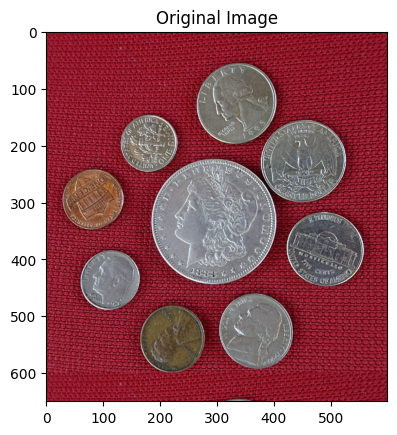

In [3]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()
#output

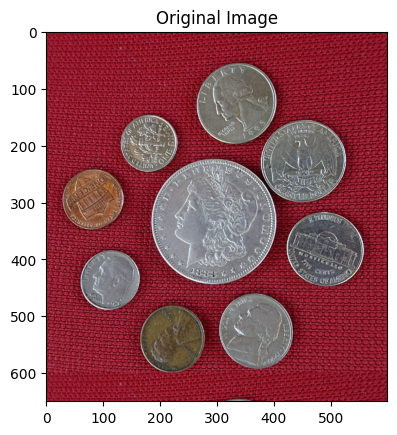

In [29]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()
# Expected output

# Step 2.1: Convert Image to Grayscale¶

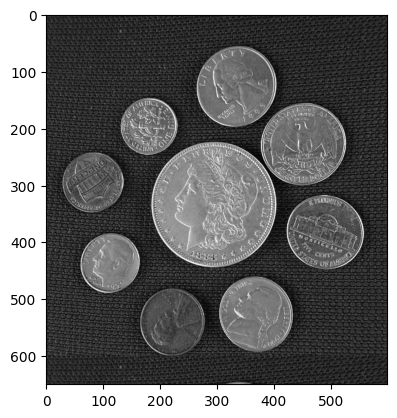

In [4]:
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='grey')
plt.show()

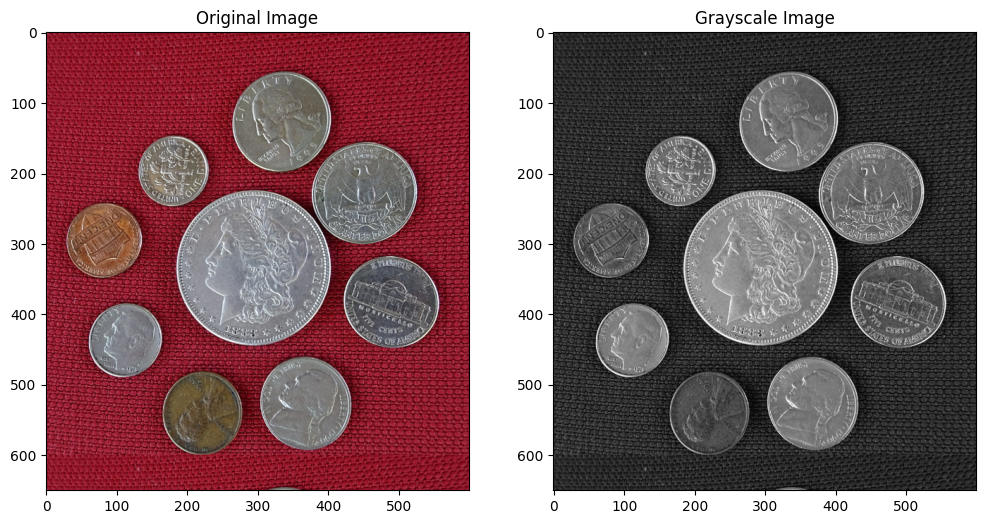

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(img_gray,cmap='gray');plt.title("Grayscale Image"); plt.show()
# Output

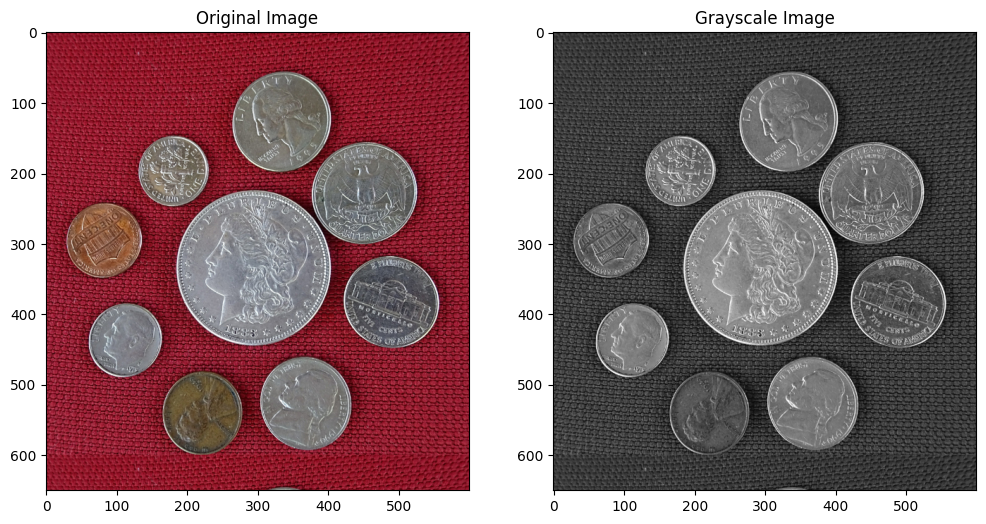

In [30]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()
# Expected output

# Step 2.2: Split Image into R,G,B Channels

In [6]:
imageB, imageG, imageR = cv2.split(image)

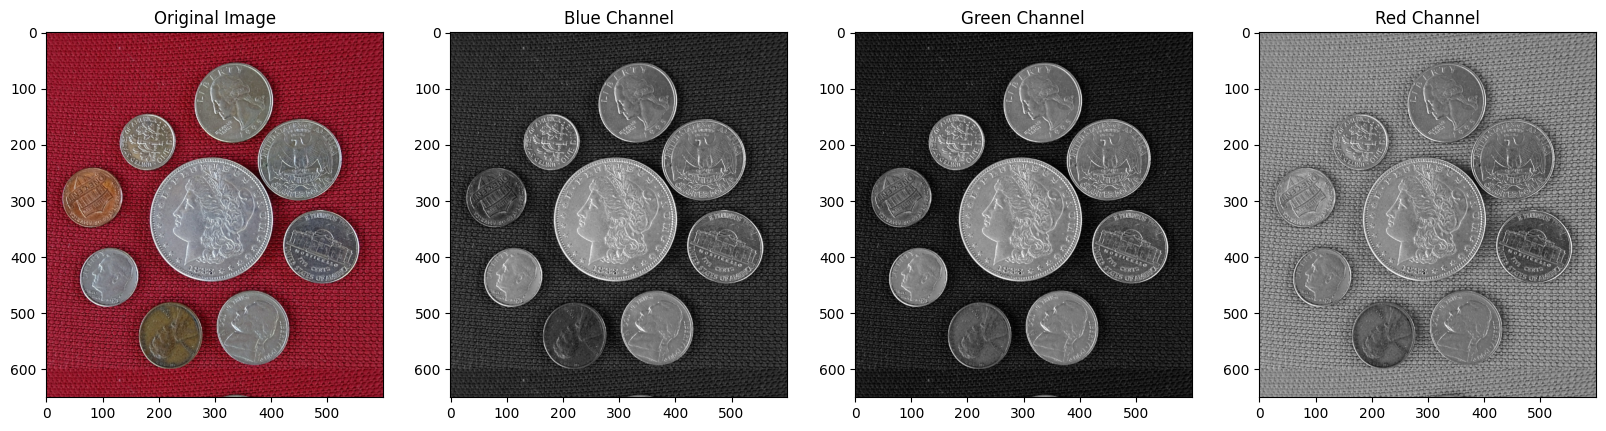

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()
# output

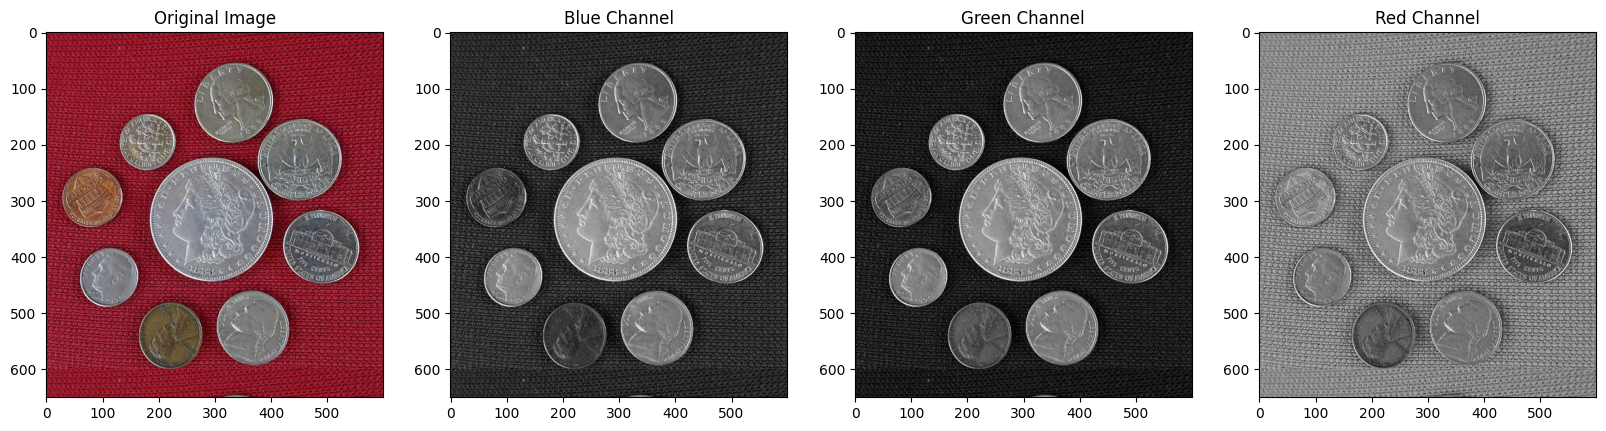

In [31]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()
# Expected output

# Step 3.1: Perform Thresholding

In [8]:
thresh=20
maxValue=255
th,dst_bin_inv=cv2.threshold(imageG,thresh,maxValue,cv2.THRESH_BINARY_INV)

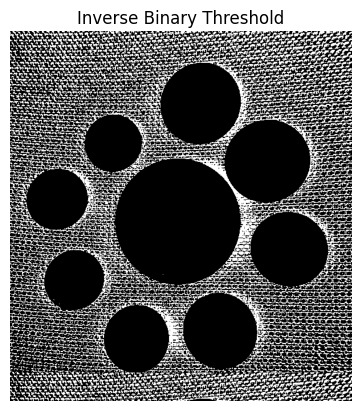

In [9]:
plt.imshow(dst_bin_inv,cmap='gray',vmin=0,vmax=255)
plt.title('Inverse Binary Threshold')
plt.axis('off')
plt.show()

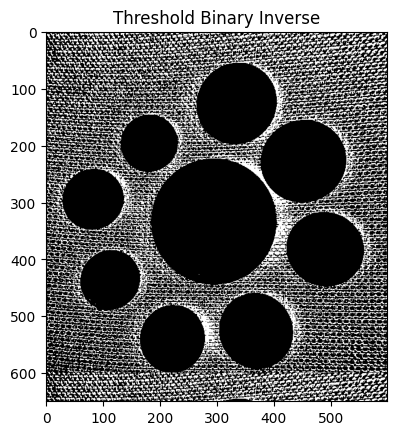

# Step 3.2: Perform morphological operations

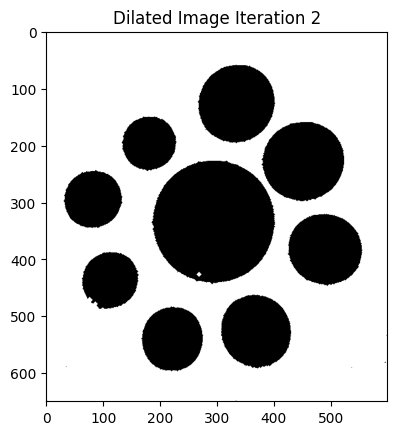

In [10]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
imageDilated2 = cv2.dilate(dst_bin_inv, kernel2, iterations=4)

plt.imshow(imageDilated2, cmap='gray')
plt.title('Dilated Image Iteration 2')
plt.axis('on')
plt.show()


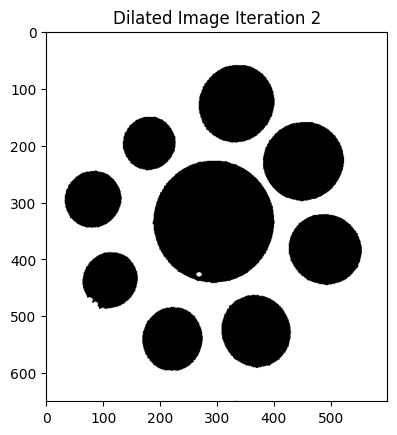

In [33]:
###
### YOUR CODE HERE
###
plt.imshow(imageDilated2,cmap='gray');plt.title('Dilated Image Iteration 2');plt.show()
# Expected output

In [13]:
# Display all the images
# you have obtained in the intermediate steps
###
### YOUR CODE HERE
###


In [11]:
# Get structuring element/kernel which will be used for dilation
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
imageEroded=cv2.erode(imageDilated2,kernel1)

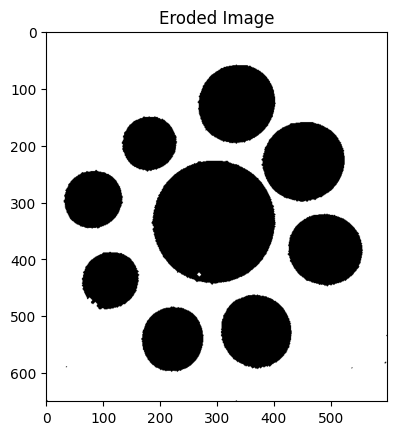

In [12]:
plt.imshow(imageEroded,cmap='gray');plt.title("Eroded Image");plt.show()
#output

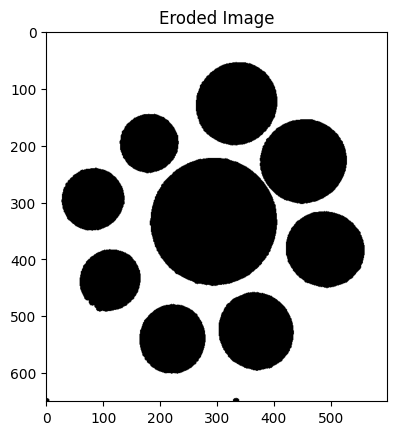

In [36]:
###
### YOUR CODE HERE
###
plt.imshow(imageEroded,cmap='gray');plt.title("Eroded Image");plt.show()
# Expected output

In [16]:
###
### YOUR CODE HERE
###

# Step 4.1: Create SimpleBlobDetector

In [38]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0
params.minDistBetweenBlobs = 2

params.filterByArea = True
params.minArea = 300
params.maxArea = 50000

params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False


In [39]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(imageEroded)

# Step 4.2: Detect Coins

In [40]:
final_image = cv2.drawKeypoints(
    image, keypoints, None,
    (0, 0, 255),  # Red color for default draw (you can override this below)
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

for k in keypoints:
    x, y = k.pt
    r = k.size / 2
    center = (int(x), int(y))
    radius = int(r)
    cv2.circle(final_image, center, radius, (0, 255, 0), 2)  # Green circle
    cv2.circle(final_image, center, 3, (255, 0, 0), -1)       # Blue center dot

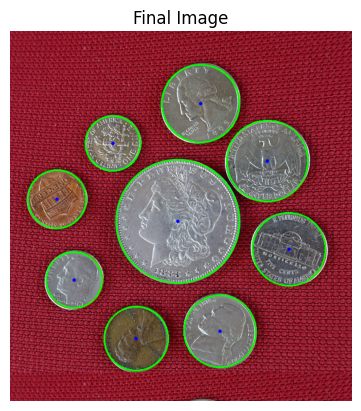

Number of coins detected: 9


In [41]:
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title("Final Image")
plt.axis("off")
plt.show()

# Print number of coins
print(f"Number of coins detected: {len(keypoints)}")

In [20]:
# Print number of coins detected
###
### YOUR CODE HERE
###
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 9


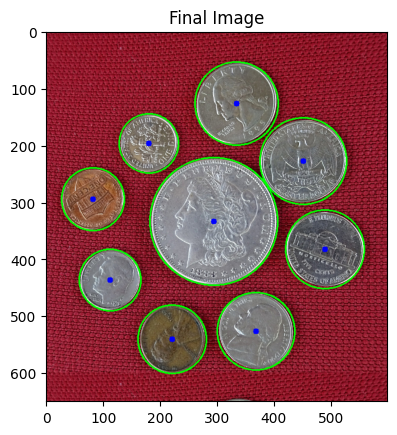

In [22]:
# Display the final image
###
### YOUR CODE HERE
###
# Expected output